In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to C:\Users\Mina
[nltk_data]     Fathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading the dataset
dataset = pd.read_csv('all.csv')
dataset

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore
...,...,...,...,...,...
568,SARA TEASDALE,"With the man I love who loves me not,\r\nI wal...",Union Square,Modern,Love
569,HART CRANE,"Hart Crane, ""Voyages I, II, III, IV, V, VI"" fr...",Voyages,Modern,Love
570,WILLIAM BUTLER YEATS,"When you are old and grey and full of sleep,\r...",When You Are Old,Modern,Love
571,CARL SANDBURG,"Give me hunger,\r\nO you gods that sit and giv...",At a Window,Modern,Love


In [3]:
# Check if there is a missing data
dataset.isnull().values.any()

False

In [4]:
# Check the type of the data to change them if necessary
print(dataset['content'].dtypes)
print(dataset['type'].dtypes)

object
object


In [6]:
# Define feature and label 
X = dataset.iloc[:, 1]
y = dataset.iloc[:, 4]

In [7]:
X

0      Let the bird of loudest lay\r\nOn the sole Ara...
1      Sir Charles into my chamber coming in,\r\nWhen...
2      Our vice runs beyond all that old men saw,\r\n...
3      Lo I the man, whose Muse whilome did maske,\r\...
4      Long have I longd to see my love againe,\r\nSt...
                             ...                        
568    With the man I love who loves me not,\r\nI wal...
569    Hart Crane, "Voyages I, II, III, IV, V, VI" fr...
570    When you are old and grey and full of sleep,\r...
571    Give me hunger,\r\nO you gods that sit and giv...
572    Potuia, potuia\r\nWhite grave goddess,\r\nPity...
Name: content, Length: 573, dtype: object

In [8]:
# Clean the text
corpus = []
ps = PorterStemmer()

def stemming(word):
    return ps.stem(word)


for i in range(0, len(dataset)):
    review = X[i].replace('\\n', ' ')
    review = review.replace('\\r', ' ')
    review = re.sub('\\\\(.*)\\\\' ,' ', review)
    review = re.sub('^[/\\()[]\'\"-_]' , ' ', review)
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = re.sub('\s+', ' ', review)
    review = review.lower()
    words = nltk.word_tokenize(review)
    review = list(map(stemming, words))
    review = ' '.join(review)
    corpus.append(review)


In [8]:
# Vectorizing text using TF-IDF model
cv = TfidfVectorizer(max_features=1000,
                     stop_words='english',
                     max_df = 0.6,
                     min_df = 3)
X = cv.fit_transform(corpus).toarray()

In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [11]:
# Training the Random Forest model on the Training set
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model is:', accuracy)

cvs_train = cross_val_score(classifier, X_train, y_train, cv=5).mean()
print('The cross validation score of train set is:', cvs_train)
      
cvs_test = cross_val_score(classifier, X_test, y_test, cv=5).mean()
print('The cross validation score of test set is:', cvs_test)

The accuracy of the model is: 0.5652173913043478
The cross validation score of test set is: 0.6461538461538462
The cross validation score of test set is: 0.6260869565217392


In [14]:
# Making Confusion Marix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  3 16]
 [ 5  1  5]
 [17  4 15]]


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_train)
y

array([0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1,
       2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,

In [16]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(train_data, train_label, plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(train_data)
    lsa_scores = lsa.transform(train_data)
    color_mapper = {label: idx for idx, label in enumerate(set(train_label))}
    color_column = [color_mapper[label] for label in train_label]
    colors = ['orange', 'blue', 'green']
    if plot:
        plt.scatter(
            lsa_scores[:, 0],
            lsa_scores[:, 1],
            s = 8,
            alpha = 0.8,
            c = train_label,
            cmap=matplotlib.colors.ListedColormap(colors),
        )
        orange_patch = mpatches.Patch(color='orange', label='Love')
        blue_patch = mpatches.Patch(color='blue', label='Mythology & Folklore')
        green_patch = mpatches.Patch(color='green', label='Nature')
        plt.legend(handles=[orange_patch, blue_patch, green_patch], prop={'size': 16})

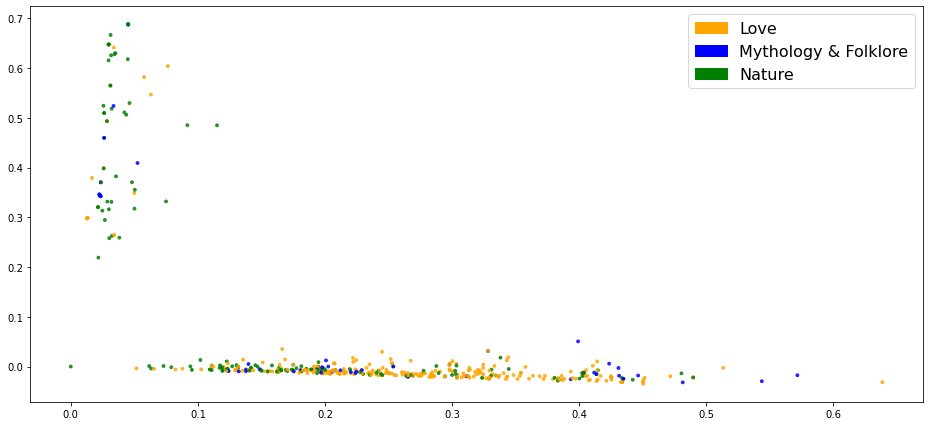

In [17]:
plt.figure(1, figsize=(16,16))
plt.subplot(2, 1, 1)
plot_LSA(X_train, y)